# Logistic regression with future prediction 18th March

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Training phase

### Reading and spliting the data

In [2]:
dataset = pd.read_csv(r"C:\Users\rezaa\Videos\Captures\11.Machine Learning\2.Classification\14_march\car_sales_classification_dartaset.csv")

X = dataset.iloc[:,2:4].values
y = dataset.iloc[:,-1].values

### Spliting and scaling

In [3]:
# Spliting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
 
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Training the model

In [4]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

## Testing phase

### Plot to show fit of the model

<Axes: >

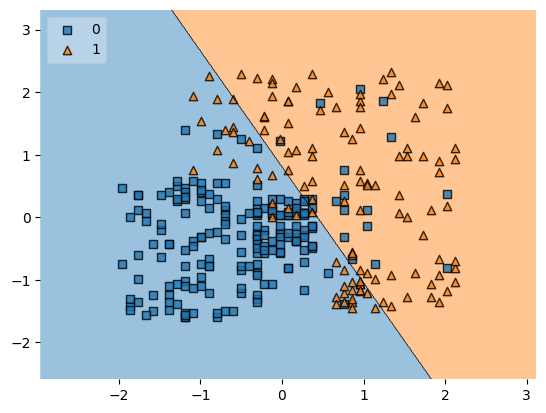

In [5]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X_train, y=y_train,clf=reg, legend=2)

### Various metrics

In [6]:
from sklearn.metrics import classification_report, accuracy_score, recall_score,confusion_matrix
print(classification_report(y_test, y_pred))
print(f'accuracy = {accuracy_score(y_test, y_pred)}')
print(f'Recall = {recall_score(y_test, y_pred)}')
print(f'Confusion matrix =\n {confusion_matrix(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        58
           1       0.94      0.77      0.85        22

    accuracy                           0.93        80
   macro avg       0.93      0.88      0.90        80
weighted avg       0.93      0.93      0.92        80

accuracy = 0.925
Recall = 0.7727272727272727
Confusion matrix =
 [[57  1]
 [ 5 17]]


### Future prediction

In [7]:
future_data = pd.read_csv(r'C:\Users\rezaa\Videos\Captures\11.Machine Learning\2.Classification\14th, 15th -LOGIT\2.LOGISTIC REGRESSION CODE  18th march code\final1.csv')
X_future_data = future_data.iloc[:,3:].values

X_future_data = sc.fit_transform(X_future_data)
y_pred_future_data = reg.predict(X_future_data)

### Data presentation

In [8]:
final = future_data.drop(columns=['Unnamed: 0'])
final['Predicted value'] = y_pred_future_data
final

,User ID,Gender,Age,EstimatedSalary,Predicted value
0,15724611,Male,45,60000,0
1,15725621,Female,79,64000,1
2,15725622,Male,23,78000,0
3,15720611,Female,34,45000,0
4,15588044,Male,29,76000,0
5,15746039,Female,70,89000,1
6,15704887,Male,86,120000,1
7,15746009,Female,46,23000,0
8,15876009,Male,32,70000,0
9,15886009,Female,100,90000,1
